In [1]:
import configparser
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import stats
import seaborn as sns
import subprocess
import sys

sys.path.append("/dors/capra_lab/users/fongsl/tools/py_")
import config_readwrite as crw
import plot_params as pp

name = "/dors/capra_lab/users/fongsl/enh_ages/core_v_derived/config_landscape"
config, configfilename = crw.read_config(name)

In [2]:
JASPAR = config["TFBS_IC"]["JASPAR_MEME"]
HEPG2 = config["ENCODE_HepG2_TFBS"]['OR_reassigned']
K562 = config["ENCODE_K562_TFBS"]['OR_reassigned']

RE_HEPG2 = config["ENCODE_HepG2_TFBS"]["results"]
RE_K562 = config["ENCODE_K562_TFBS"]["results"]

In [3]:
def motif_info(line):
    
    # motif info from str formatting
    motif_id, motif_name = line.split(" ")[1:]
        
    motif_array = np.array([0.00001, 0.00001, 0.00001, 0.00001])
    
    return motif_id, motif_name.strip("\n"), motif_array

In [4]:
def lineTolist(line):
    
    a = ((line.strip("\n")).split(" "))  # str formatting. Remove "\n" and split on whitespace
    a = [float(i) for i in a if i]  # remove items in list w whitespace. 

    return a  # return list

In [5]:
def quantify_infoContent(motif_array):
    
    #nrows = motif_array.shape[0]
    
    bkgd = [0.3, 0.2, 0.2, 0.3]

    # quantify information content. 

    info_content = 0
    for position in motif_array[1:]:

        for i, pb in enumerate(position):
            pb = pb +0.000001
            qb = bkgd[i]
            info_content = info_content + pb*np.log2((pb/qb))

#    print(info_content)
    #info_content = stats.entropy(motif_array, bkgd)
    
    return info_content

In [6]:
stop = 2

info = {} # collect information content

with open(JASPAR, "r") as reader:
    r = reader.readlines()
    val = 0

    for line in r:
        
        if "MOTIF" in line:
            
            motif_id, motif_name, motif_array = motif_info(line)
            
            val +=1
        
        elif "letter-probability" in line:
            continue
            
        elif "URL" in line:  # calculate information content
            
            info_content = quantify_infoContent(motif_array)
            
            info[motif_name] = info_content

            print(motif_name, info_content)
            #if val ==stop:
             #   break
        
        # for lines w/ no information to parse
        elif val<1 or line == "\n":
            
            continue
            
        else:
            # format line from str to line_list
            line_list = lineTolist(line)
            
            # add line to the motif array 
            motif_array = np.vstack([motif_array, line_list])

Arnt 11.665308444195569
Ahr::Arnt 10.46447174863189
Ddit3::Cebpa 11.885031235105615
NFIL3 12.948851855200521
Mecom 16.52225098923505
FOXF2 13.934961001204831
FOXD1 11.108849093696412
Gfi1 9.124356631725473
Foxq1 12.476493274839225
Foxd3 11.356392090669683
IRF2 20.73779233334891
MZF1 9.551717739690694
MZF1(var.2) 10.2064291780543
MAX::MYC 15.215324884769055
Nkx2-5 7.322949012406924
PPARG 21.225306585383073
Pax2 6.516697899048309
Pax6 13.652162513110559
PBX1 13.661590719776804
RORA 13.039342864814458
RORA(var.2) 16.764275255025787
RREB1 24.302505558861863
RXRA::VDR 21.126378290617367
SOX9 8.597181582064362
Sox17 10.153395802030346
SPIB 9.128775542166524
SRY 8.079031133982642
Sox5 9.803123906358588
MAFG::NFE2L1 7.839402959132655
TAL1::TCF3 14.090874918452338
Hand1::Tcf3 10.478230339940863
REL 11.15319179305435
RELA 15.440937450368434
TBP 9.44605175131067
HLTF 7.161329568427634
Spz1 12.473952217849122
NR1H2::RXRA 27.82815544766774
Znf423 19.935241446147305
NFIC::TLX1 20.88103768175943
Nobo

HSF2 16.568375368468608
HSF4 13.390085531840937
IRF7 17.011145711979683
MEF2A 15.50738858469021
MEF2D 16.923630969915664
MEIS1 7.954664011129489
MEIS2 11.221135173629037
MEIS3 9.172796759327221
MYBL1 15.475763320583546
MYBL2 17.031279362737635
NFKB1 22.141277304652487
NFKB2 18.153466067940123
PAX1 20.80031198817228
PAX3 13.672051268827206
PAX9 23.490373269817322
PKNOX1 21.739532035128445
PKNOX2 21.5325590922821
POU1F1 13.331223523515543
POU2F1 10.64102830160078
POU3F1 10.385955287214813
POU3F2 12.181133453524781
POU3F3 11.652482808980873
POU3F4 12.152862916901617
POU4F1 11.202244426744963
POU4F3 11.934716744546945
POU5F1B 9.37019262331897
POU6F2 10.748190429345266
PROX1 17.02627405178354
RFX2 20.789239748595808
SMAD3 15.734250016576595
TGIF1 22.58015286421025
TGIF2 18.645181060189373
RFX3 17.39667020738161
RFX4 15.994275166829592
RFX5 21.049449137703316
RUNX2 11.824085994165914
EOMES 12.266342242093216
MGA 11.1384335921182
TBR1 12.34026944716356
TBX15 13.58272944292946
TBX19 17.2748615

# Information content x HepG2 TF ChIP-seq OR enrichment 

In [7]:
def make_ic_df(key, arch, info):
    
    newdf = pd.DataFrame({
                            "tf":[key], 
                            "arch":[arch], 
                            "IC":[info[key]],
                           })
    
    return newdf

In [8]:
def get_tfChIP_sets(df):
    
    core_tfs, der_tfs = set(df.loc[df.OR <1, "tf"]), set(df.loc[df.OR >1, "tf"])

    print("core ChIP n=", len(core_tfs), "\nder ChIP n=", len(der_tfs))

    return core_tfs, der_tfs

In [9]:
def welchs_test(resultsDict):
   
    der_IC = list(resultsDict.loc[resultsDict["arch"] =="der", "IC"])
    core_IC = list(resultsDict.loc[resultsDict["arch"] !="der", "IC"])
    
    # Welch's test: equal_var = False, 
    s, p = stats.ttest_ind(der_IC, core_IC, equal_var = False)
    print("Welch's test stat=", s,"p=", p)
    
    return s,p

In [10]:
def do_stats(resultsDf):
    print("TF ChIP w JASPAR motif", resultsDf.groupby("arch")["tf"].count(), "\n\n")

    print(resultsDf.groupby("arch")["IC"].describe())

In [11]:
def annotate_boxplot_count(data, x, y, ax):
    stat_data = data.groupby(x)[y].describe().reset_index()
    for i, l in enumerate(stat_data["count"]):
        print(i, l, data[y].iloc[i])
    
        ax.annotate(int(l), (i-0.01, int(stat_data["50%"].iloc[i])+0.1) )

## get JASPAR TF names

In [12]:
keys = info.keys()  # list of JASPAR TFs

## load HepG2 TF ChIP-seq enrichment. 

In [41]:
OR = pd.read_csv(HEPG2, sep = '\t')

sig = OR.loc[
            (OR["arch"] == "complex_derived_v_complex_core") &
            (OR["universe"]== "TFBS")&
            (OR["reject_null"]==True)
            ]
allOR = OR.loc[
            (OR["arch"] == "complex_derived_v_complex_core") &
            (OR["universe"]== "TFBS")
            ]
allOR["arch"] = "der"
allOR.loc[allOR["OR"]<1, "arch"] = "core"

/home/fongsl/.conda/envs/sfenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/fongsl/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [42]:
OR.head()

,OR,P,a,b,c,ci_lower,ci_upper,comparison_name,d,universe,reject_null,FDR_P,arch,tf,log2,taxon2
0,1.008310,0.879902,816.0,39680.0,793.0,0.913516,1.112939,TFAP4-complex_derived_v_complex_core-TFBS,38882.0,TFBS,False,0.905782,complex_derived_v_complex_core,TFAP4,0.011939,Eutheria
1,0.861237,0.002967,768.0,39728.0,871.0,0.780824,0.949932,TCF7-complex_derived_v_complex_core-TFBS,38804.0,TFBS,True,0.008653,complex_derived_v_complex_core,TCF7,-0.215517,Eutheria
2,1.090976,0.237403,415.0,40081.0,373.0,0.947946,1.255588,MNT-complex_derived_v_complex_core-TFBS,39302.0,TFBS,False,0.383497,complex_derived_v_complex_core,MNT,0.125620,Eutheria
3,0.877278,0.000386,1457.0,39039.0,1619.0,0.816195,0.942932,FOXA1-complex_derived_v_complex_core-TFBS,38056.0,TFBS,True,0.001761,complex_derived_v_complex_core,FOXA1,-0.188894,Eutheria
4,0.840355,0.000002,1423.0,39073.0,1648.0,0.781728,0.903379,FOXA2-complex_derived_v_complex_core-TFBS,38027.0,TFBS,True,0.000037,complex_derived_v_complex_core,FOXA2,-0.250928,Eutheria


## get info content for motifs w/ significant tfs in core/derived

In [43]:
"""
1. get sets of sig. enriched core, derived tf names 
2. make dictionary object to collect information content linked to TFs in core/derived
3. per core/derived test, for each TF
4. make a unique key of ARCH + TF name
5. make a dataframe with the TF, architecture label, and information content value. 
6. add to dictionary.
7. concat dictionary values (dataframes)
8. Welch's test for significant differences in information content between core and derived motifs. 
"""

#1
core_tfs, der_tfs = get_tfChIP_sets(sig)

#2
collection_dict = {}

sig_tfsets = [("der", der_tfs), ("core", core_tfs)]

#3
for arch, tfset in sig_tfsets:
    
    for key in tfset:
    
        if key in keys:
            
            #4 make a unique key
            # bc some TFs are enriched in cores for some ages and derived for other ages (e.g. SP1)
            uniqueKey = arch+"-"+key  
            
            #5
            newdf = make_ic_df(key, arch, info)
            
            #6
            collection_dict[uniqueKey] = newdf

#7
sig_results = pd.concat(collection_dict.values())

#8 Do welch's test to evaluate significance
welchs_test(sig_results)

core ChIP n= 23 
der ChIP n= 36
Welch's test stat= 2.376632074963569 p= 0.03428861508260724


(2.376632074963569, 0.03428861508260724)

In [44]:
do_stats(sig_results)

TF ChIP w JASPAR motif arch
core    9
der     7
Name: tf, dtype: int64 


      count       mean       std        min        25%        50%        75%  \
arch                                                                           
core    9.0  12.486972  2.269779   9.686867  11.016601  12.569361  13.926565   
der     7.0  15.341333  2.467784  12.344049  13.597997  14.900883  16.786729   

            max  
arch             
core  15.740664  
der   19.374945  


## all tfs enriched in core/derived


In [45]:
"""
1. get sets of sig. enriched core, derived tf names 
2. make dictionary object to collect information content linked to TFs in core/derived
3. per core/derived test, for each TF
4. make a unique key of ARCH + TF name
5. make a dataframe with the TF, architecture label, and information content value. 
6. add to dictionary.
7. concat dictionary values (dataframes)
8. Welch's test for significant differences in information content between core and derived motifs. 
"""

#1
core_tfs, der_tfs = get_tfChIP_sets(allOR)

#2
collection_dict = {}

tfsets = [("der", der_tfs), ("core", core_tfs)]

#3
for arch, tfset in tfsets:
    
    for key in tfset:
    
        if key in keys:
            
            #4 make a unique key
            # bc some TFs are enriched in cores for some ages and derived for other ages (e.g. SP1)
            uniqueKey = arch+"-"+key  
            
            #5
            newdf = make_ic_df(key, arch, info)
            
            #6
            collection_dict[uniqueKey] = newdf

#7
results = pd.concat(collection_dict.values())

#8 Do welch's test to evaluate significance
welchs_test(results)

core ChIP n= 101 
der ChIP n= 105
Welch's test stat= -0.31198145447478437 p= 0.7561662362675851


(-0.31198145447478437, 0.7561662362675851)

In [46]:
do_stats(results)

TF ChIP w JASPAR motif arch
core    29
der     32
Name: tf, dtype: int64 


      count       mean       std       min        25%        50%        75%  \
arch                                                                          
core   29.0  14.629483  3.321230  9.686867  12.569361  14.221260  16.328181   
der    32.0  14.364236  3.310463  9.446052  12.306363  14.056811  15.887543   

            max  
arch             
core  24.926584  
der   24.926584  


In [47]:
sig_results

,tf,arch,IC
0,USF1,der,14.221260
0,CTCF,der,19.374945
0,ZBTB7A,der,12.974735
0,MAX,der,12.344049
0,ELF1,der,16.957485
0,YY1,der,14.900883
0,NRF1,der,16.615973
0,MAFF,core,15.740664
0,SOX13,core,9.889662
0,FOXA1,core,12.752855


In [48]:
# consider sequence enrichment in each category. 

taxon_results = pd.merge(allOR[["tf", "arch", "taxon2"]].drop_duplicates(), results).drop_duplicates()


# count the number of taxons where an architecture is enriched. 
counts = (taxon_results.groupby(["tf", "arch"])["taxon2"].count().reset_index())

# find the architecture with the most enrichments
max_counts = counts.groupby('tf')["taxon2"].max().reset_index()

# add back the architecture identity
max_counts = pd.merge(max_counts, counts, how = "left")

# add back the tf and information content. 
max_counts = pd.merge(max_counts, taxon_results[["tf", "IC"]], how = "left").drop_duplicates()

No handles with labels found to put in legend.


0 9.0 14.221260110468407
1 7.0 19.374944539803522
0 16.0 17.379272248393097
1 16.0 13.610464574948931


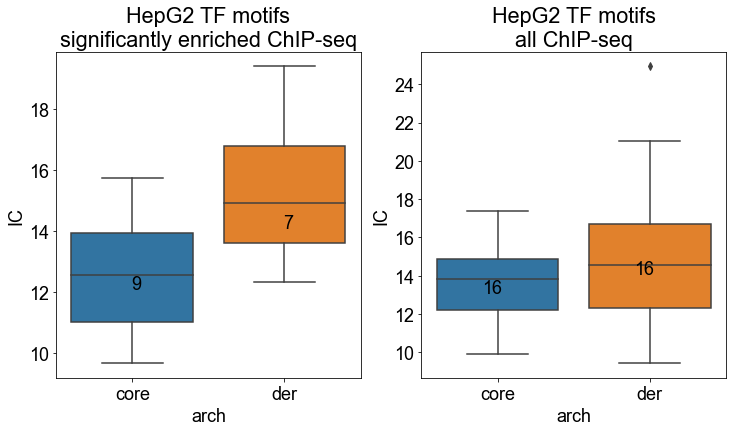

In [49]:
pp.fonts()
cell_line = 'HepG2'
x="arch"
y="IC"
order = ["core", "der"]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,6))

# plot sig ChIP TF motif IC 
data=sig_results
sns.boxplot(x=x,y=y,data=data, order=order, ax=ax1)
ax1.set(title=f"{cell_line} TF motifs\nsignificantly enriched ChIP-seq")
annotate_boxplot_count(data, x, y, ax1)

# plot all ChIP TF motif IC 

data=max_counts
#taxon_order = [ 'Vertebrata', 'Amniota',  'Mammalia','Theria','Eutheria', 'Boreoeutheria', 'Primate']
sns.boxplot(x=x,y=y,data=data, order=order, ax=ax2)
ax2.set(title=f"{cell_line} TF motifs\nall ChIP-seq")
ax2.legend(bbox_to_anchor = (1,1)).remove()
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 60, horizontalalignment = "right")

stat_data = data.groupby([x])[y].describe().reset_index()

for i, l in enumerate(stat_data["count"]):
    print(i, l, data[y].iloc[i])

    ax2.annotate(int(l), (i-0.1, int(stat_data["50%"].iloc[i])+0.1) )

out = os.path.join(RE_HEPG2, f"{cell_line}_TFBS_ChIP-seq_JASPAR_information_content.pdf")
plt.savefig(out, bbox_inches = 'tight')

In [28]:
stat_data 

,arch,count,mean,std,min,25%,50%,75%,max
0,core,16.0,13.571357,2.116933,9.889662,12.224913,13.839436,14.889646,17.379272
1,der,16.0,15.157116,4.102000,9.446052,12.306363,14.561071,16.701351,24.926584


In [50]:
do_stats(max_counts), welchs_test(max_counts)

TF ChIP w JASPAR motif arch
core    16
der     16
Name: tf, dtype: int64 


      count       mean       std       min        25%        50%        75%  \
arch                                                                          
core   16.0  13.571357  2.116933  9.889662  12.224913  13.839436  14.889646   
der    16.0  15.157116  4.102000  9.446052  12.306363  14.561071  16.701351   

            max  
arch             
core  17.379272  
der   24.926584  
Welch's test stat= 1.3741300894677297 p= 0.18295957409574687


(None, (1.3741300894677297, 0.18295957409574687))

### SP1 overlaps both core and derived regions 

In [29]:
allOR.loc[allOR["tf"]=="SP1"]

,OR,P,a,b,c,ci_lower,ci_upper,comparison_name,d,universe,reject_null,FDR_P,arch,tf,log2,taxon2
43,0.884907,0.002769,1185.0,39311.0,1307.0,0.816981,0.958481,SP1-complex_derived_v_complex_core-TFBS,38368.0,TFBS,True,0.008306,core,SP1,-0.176402,Eutheria
1347,1.045292,0.633026,129.0,5253.0,1180.0,0.869649,1.256409,SP1-complex_derived_v_complex_core-TFBS,50227.0,TFBS,False,0.886600,der,SP1,0.063906,Vertebrata
2676,0.992955,0.898340,586.0,23327.0,1179.0,0.898190,1.097718,SP1-complex_derived_v_complex_core-TFBS,46602.0,TFBS,False,0.932562,core,SP1,-0.010200,Amniota
3947,0.979657,0.757272,454.0,15449.0,657.0,0.867682,1.106082,SP1-complex_derived_v_complex_core-TFBS,21902.0,TFBS,False,0.856047,core,SP1,-0.029652,Theria
5214,0.856439,0.124647,150.0,5541.0,358.0,0.705893,1.039093,SP1-complex_derived_v_complex_core-TFBS,11326.0,TFBS,False,0.239450,core,SP1,-0.223577,Mammalia
6384,0.947062,0.576384,432.0,12985.0,135.0,0.778047,1.152793,SP1-complex_derived_v_complex_core-TFBS,3843.0,TFBS,False,1.000000,core,SP1,-0.078469,Boreoeutheria
7499,0.765705,0.545625,246.0,7068.0,1.0,0.102797,5.703514,SP1-complex_derived_v_complex_core-TFBS,22.0,TFBS,False,1.000000,core,SP1,-0.385140,Primate


# k562

In [30]:
OR = pd.read_csv(K562, sep = '\t')

sig = OR.loc[
            (OR["arch"] == "complex_derived_v_complex_core") &
            (OR["universe"]== "TFBS")&
            (OR["reject_null"]==True)
            ]
allOR = OR.loc[
            (OR["arch"] == "complex_derived_v_complex_core") &
            (OR["universe"]== "TFBS")
            ]

allOR["arch"] = "der"
allOR.loc[allOR["OR"]<1, "arch"] = "core"

/home/fongsl/.conda/envs/sfenv/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/fongsl/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


## sig tfs

In [31]:
"""
1. get sets of sig. enriched core, derived tf names 
2. make dictionary object to collect information content linked to TFs in core/derived
3. per core/derived test, for each TF
4. make a unique key of ARCH + TF name
5. make a dataframe with the TF, architecture label, and information content value. 
6. add to dictionary.
7. concat dictionary values (dataframes)
8. Welch's test for significant differences in information content between core and derived motifs. 
"""

#1
core_tfs, der_tfs = get_tfChIP_sets(sig)

#2
collection_dict = {}

sig_tfsets = [("der", der_tfs), ("core", core_tfs)]

#3
for arch, tfset in sig_tfsets:
    
    for key in tfset:
    
        if key in keys:
            
            #4 make a unique key
            # bc some TFs are enriched in cores for some ages and derived for other ages (e.g. SP1)
            uniqueKey = arch+"-"+key  
            
            #5
            newdf = make_ic_df(key, arch, info)
            
            #6
            collection_dict[uniqueKey] = newdf

#7
sig_results = pd.concat(collection_dict.values())

#8 Do welch's test to evaluate significance
welchs_test(sig_results)

core ChIP n= 26 
der ChIP n= 29
Welch's test stat= 1.1983520851073317 p= 0.2625774483381045


(1.1983520851073317, 0.2625774483381045)

In [32]:
do_stats(sig_results)

TF ChIP w JASPAR motif arch
core    4
der     7
Name: tf, dtype: int64 


      count       mean       std        min        25%        50%        75%  \
arch                                                                           
core    4.0  14.421750  2.380573  11.016601  13.705316  15.171109  15.887543   
der     7.0  16.601944  3.640354  12.715462  14.023694  15.643142  19.123704   

            max  
arch             
core  16.328181  
der   21.560206  


## all tfs

In [33]:
"""
1. get sets of sig. enriched core, derived tf names 
2. make dictionary object to collect information content linked to TFs in core/derived
3. per core/derived test, for each TF
4. make a unique key of ARCH + TF name
5. make a dataframe with the TF, architecture label, and information content value. 
6. add to dictionary.
7. concat dictionary values (dataframes)
8. Welch's test for significant differences in information content between core and derived motifs. 
"""

#1
core_tfs, der_tfs = get_tfChIP_sets(allOR)

#2
collection_dict = {}

tfsets = [("der", der_tfs), ("core", core_tfs)]

#3
for arch, tfset in tfsets:
    
    for key in tfset:
    
        if key in keys:
            
            #4 make a unique key
            # bc some TFs are enriched in cores for some ages and derived for other ages (e.g. SP1)
            uniqueKey = arch+"-"+key  
            
            #5
            newdf = make_ic_df(key, arch, info)
            
            #6
            collection_dict[uniqueKey] = newdf

#7
results = pd.concat(collection_dict.values())

#8 Do welch's test to evaluate significance
welchs_test(results)

core ChIP n= 229 
der ChIP n= 230
Welch's test stat= -0.05308397887408403 p= 0.9577446775937761


(-0.05308397887408403, 0.9577446775937761)

In [34]:
do_stats(results)

TF ChIP w JASPAR motif arch
core    68
der     67
Name: tf, dtype: int64 


      count       mean       std       min        25%        50%        75%  \
arch                                                                          
core   68.0  15.078302  3.893365  7.374992  12.650282  14.903903  16.980586   
der    67.0  15.042641  3.911544  7.374992  12.623308  14.900883  16.960586   

            max  
arch             
core  24.926584  
der   24.926584  


0 4.0 16.811699520073386
1 7.0 15.072654085888587
0 68.0 15.740663943721298
1 67.0 8.44271251933297


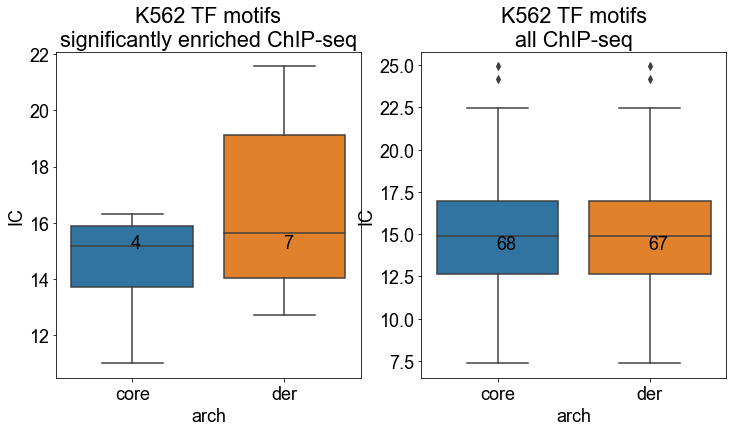

In [35]:
pp.fonts()
cell_line = 'K562'
x="arch"
y="IC"
order = ["core", "der"]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,6))

# plot sig ChIP TF motif IC 
data=sig_results
sns.boxplot(x=x,y=y,data=data, order=order, ax=ax1)
ax1.set(title=f"{cell_line} TF motifs\nsignificantly enriched ChIP-seq")
annotate_boxplot_count(data, x, y, ax1)

# plot all ChIP TF motif IC 
data=results
sns.boxplot(x=x,y=y,data=data,order=order, ax=ax2)
ax2.set(title=f"{cell_line} TF motifs\nall ChIP-seq")
annotate_boxplot_count(data, x, y, ax2)

out = os.path.join(RE_K562, f"{cell_line}_TFBS_ChIP-seq_JASPAR_information_content.pdf")
plt.savefig(out, bbox_inches = 'tight')

In [37]:
# consider sequence enrichment in each category. 

taxon_results = pd.merge(allOR[["tf", "arch", "taxon2"]].drop_duplicates(), results).drop_duplicates()


# count the number of taxons where an architecture is enriched. 
counts = (taxon_results.groupby(["tf", "arch"])["taxon2"].count().reset_index())

# find the architecture with the most enrichments
max_counts = counts.groupby('tf')["taxon2"].max().reset_index()

# add back the architecture identity
max_counts = pd.merge(max_counts, counts, how = "left")

# add back the tf and information content. 
max_counts = pd.merge(max_counts, taxon_results[["tf", "IC"]], how = "left").drop_duplicates()

0 4.0 16.811699520073386
1 7.0 15.072654085888587
0 39.0 15.428178092590914
1 31.0 17.379272248393097


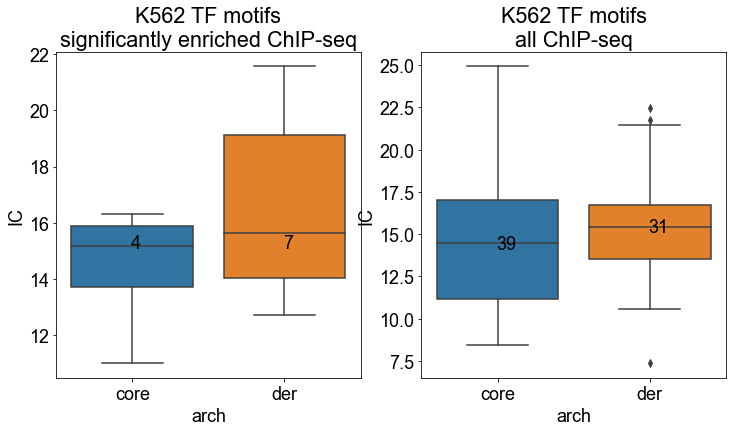

In [38]:
pp.fonts()
cell_line = 'K562'
x="arch"
y="IC"
order = ["core", "der"]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,6))

# plot sig ChIP TF motif IC 
data=sig_results
sns.boxplot(x=x,y=y,data=data, order=order, ax=ax1)
ax1.set(title=f"{cell_line} TF motifs\nsignificantly enriched ChIP-seq")
annotate_boxplot_count(data, x, y, ax1)

# plot all ChIP TF motif IC 
data=max_counts
sns.boxplot(x=x,y=y,data=data,order=order, ax=ax2)
ax2.set(title=f"{cell_line} TF motifs\nall ChIP-seq")
annotate_boxplot_count(data, x, y, ax2)

out = os.path.join(RE_K562, f"{cell_line}_TFBS_ChIP-seq_JASPAR_information_content.pdf")
plt.savefig(out, bbox_inches = 'tight')

In [39]:
do_stats(max_counts), welchs_test(max_counts)

TF ChIP w JASPAR motif arch
core    39
der     31
Name: tf, dtype: int64 


      count       mean       std       min        25%        50%        75%  \
arch                                                                          
core   39.0  14.713525  4.121563  8.442713  11.180302  14.456950  17.035290   
der    31.0  15.568484  3.454112  7.374992  13.504428  15.428178  16.713836   

            max  
arch             
core  24.926584  
der   22.481492  


Welch's test stat= 0.9438920778579815 p= 0.3485770196334782


(0.9438920778579815, 0.3485770196334782)